<a href="https://colab.research.google.com/github/Fardous07/Speech-recognition-Using-Tensorflow/blob/main/inverseproblemNoisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

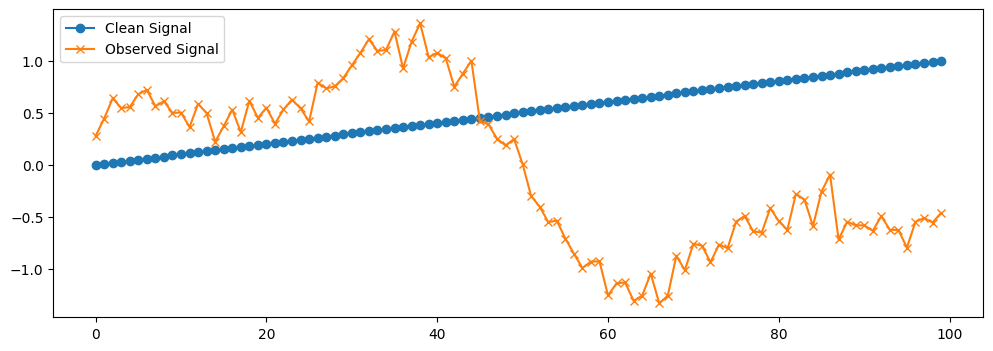

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import tensorflow as tf
from tensorflow.keras.layers import Dense

def simulate_nonlinear_forward_problem(clean_signal, distortion_function, noise_level):
    # Simulate distorted and noisy observed signal
    distorted_signal = distortion_function(clean_signal)
    noisy_observed_signal = distorted_signal + np.random.normal(0, noise_level, len(distorted_signal))

    return noisy_observed_signal

# Example usage:
def nonlinear_distortion_function(signal):
    return np.sin(2 * np.pi * signal) + 0.5 * np.cos(5 * np.pi * signal)

clean_signal = np.linspace(0, 1, 100)
noise_level = 0.1

observed_signal = simulate_nonlinear_forward_problem(clean_signal, nonlinear_distortion_function, noise_level)

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(clean_signal, label='Clean Signal', marker='o')
plt.plot(observed_signal, label='Observed Signal', marker='x')
plt.legend()
plt.show()


In [ ]:

#NN approach
# Model definition
def create_nonlinear_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(len(observed_signal),)),
        Dense(len(clean_signal), activation='linear')  # Output layer with linear activation for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training the nonlinear model
nonlinear_model = create_nonlinear_model()
nonlinear_model.fit(np.expand_dims(observed_signal, axis=0), np.expand_dims(clean_signal, axis=0), epochs=50, verbose=0)

In [ ]:
# Model definition (considering sequence data)
def create_nonlinear_rnn_model():
    model = Sequential([
        SimpleRNN(32, activation='relu', input_shape=(len(observed_signal), 1)),
        Dense(len(clean_signal), activation='linear')  # Output layer with linear activation for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training the nonlinear RNN
nonlinear_rnn_model = create_nonlinear_rnn_model()
nonlinear_rnn_model.fit(np.expand_dims(observed_signal, axis=-1), np.expand_dims(clean_signal, axis=-1), epochs=50, verbose=0)


In [ ]:
from keras.regularizers import l2

def create_l2_regularization_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(input_dim,)))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(output_dim, activation='linear', kernel_regularizer=l2(0.01)))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


4/4 [==============================] - 0s 6ms/step


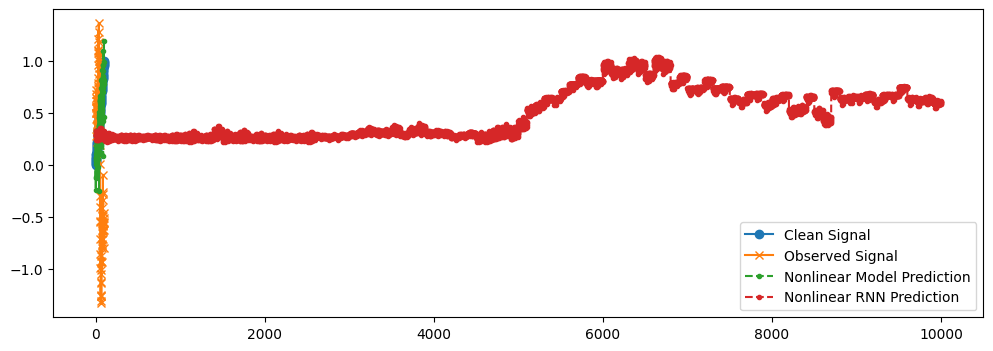

In [ ]:
# Evaluate nonlinear model on simulated data
nonlinear_prediction = nonlinear_model.predict(np.expand_dims(observed_signal, axis=0)).flatten()

# Evaluate nonlinear RNN on simulated data
nonlinear_rnn_prediction = nonlinear_rnn_model.predict(np.expand_dims(observed_signal, axis=-1)).flatten()

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(clean_signal, label='Clean Signal', marker='o')
plt.plot(observed_signal, label='Observed Signal', marker='x')
plt.plot(nonlinear_prediction, label='Nonlinear Model Prediction', linestyle='--', marker='.')
plt.plot(nonlinear_rnn_prediction, label='Nonlinear RNN Prediction', linestyle='--', marker='.')
plt.legend()
plt.show()


4/4 [==============================] - 0s 5ms/step


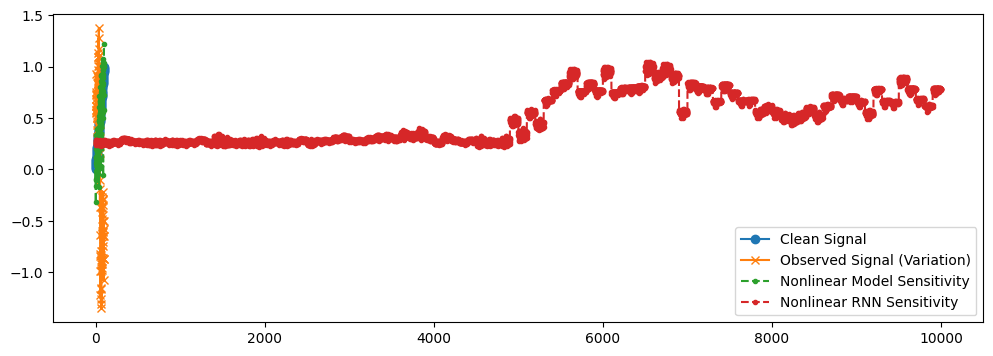

In [ ]:
# Analyze sensitivity of nonlinear model
observed_signal_variation = simulate_nonlinear_forward_problem(clean_signal, nonlinear_distortion_function, noise_level * 2)
nonlinear_sensitivity = nonlinear_model.predict(np.expand_dims(observed_signal_variation, axis=0)).flatten()

# Analyze sensitivity of nonlinear RNN model
nonlinear_rnn_sensitivity = nonlinear_rnn_model.predict(np.expand_dims(observed_signal_variation, axis=-1)).flatten()

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(clean_signal, label='Clean Signal', marker='o')
plt.plot(observed_signal_variation, label='Observed Signal (Variation)', marker='x')
plt.plot(nonlinear_sensitivity, label='Nonlinear Model Sensitivity', linestyle='--', marker='.')
plt.plot(nonlinear_rnn_sensitivity, label='Nonlinear RNN Sensitivity', linestyle='--', marker='.')
plt.legend()
plt.show()


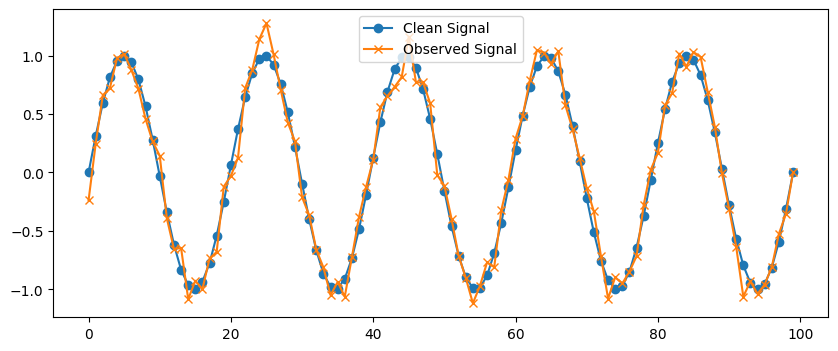

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a clean signal
def generate_clean_signal(length=100):
    t = np.linspace(0, 1, length)
    clean_signal = np.sin(2 * np.pi * 5 * t)  # Example: A sinusoidal signal
    return clean_signal

# Function to simulate the forward problem (add noise)
def simulate_forward_problem(clean_signal, noise_level=0.1):
    noise = noise_level * np.random.randn(len(clean_signal))
    observed_signal = clean_signal + noise
    return observed_signal

# Generate clean signal and simulate observed signal
clean_signal = generate_clean_signal()
observed_signal = simulate_forward_problem(clean_signal)

# Plot the signals
plt.figure(figsize=(10, 4))
plt.plot(clean_signal, label='Clean Signal', marker='o')
plt.plot(observed_signal, label='Observed Signal', marker='x')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Function to create a simple dense model
def create_dense_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(len(observed_signal),)),
        Dense(len(clean_signal), activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to create a simple RNN model
def create_rnn_model():
    model = Sequential([
        SimpleRNN(32, activation='relu', input_shape=(len(observed_signal), 1)),
        Dense(len(clean_signal), activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training the models
dense_model = create_dense_model()
rnn_model = create_rnn_model()

dense_model.fit(np.expand_dims(observed_signal, axis=0), np.expand_dims(clean_signal, axis=0), epochs=50, verbose=0)
rnn_model.fit(np.expand_dims(observed_signal, axis=-1), np.expand_dims(clean_signal, axis=-1), epochs=50, verbose=0)


4/4 [==============================] - 0s 6ms/step


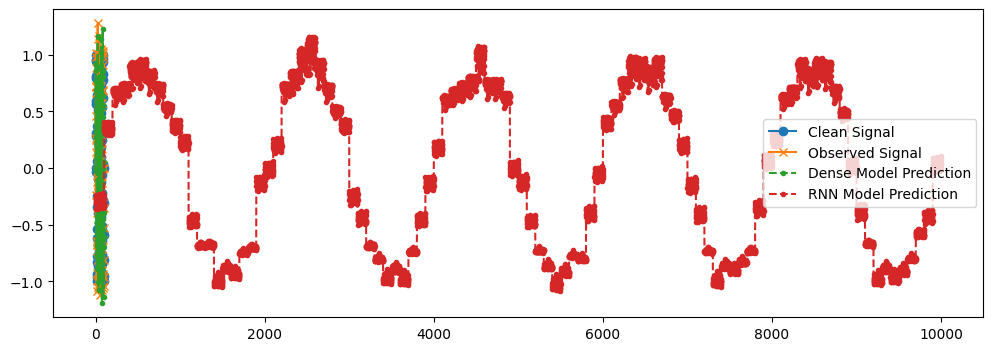

4/4 [==============================] - 0s 11ms/step


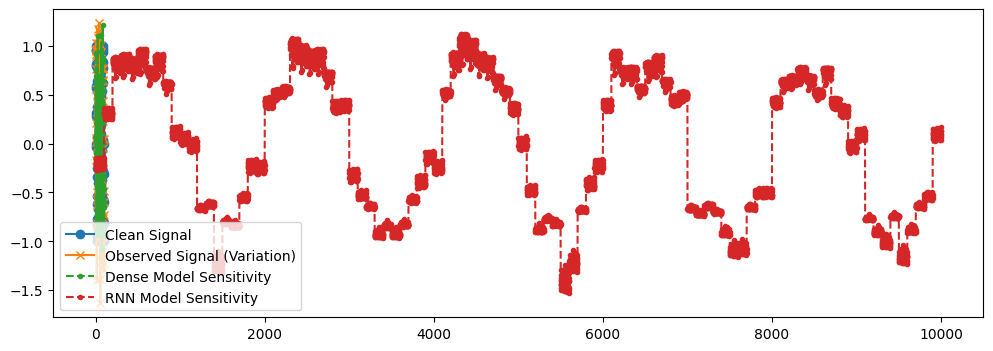

In [ ]:
# Evaluate models on simulated data
dense_prediction = dense_model.predict(np.expand_dims(observed_signal, axis=0)).flatten()
rnn_prediction = rnn_model.predict(np.expand_dims(observed_signal, axis=-1)).flatten()

# Plot results
plt.figure(figsize=(12, 4))
plt.plot(clean_signal, label='Clean Signal', marker='o')
plt.plot(observed_signal, label='Observed Signal', marker='x')
plt.plot(dense_prediction, label='Dense Model Prediction', linestyle='--', marker='.')
plt.plot(rnn_prediction, label='RNN Model Prediction', linestyle='--', marker='.')
plt.legend()
plt.show()

# Sensitivity analysis
observed_signal_variation = simulate_forward_problem(clean_signal, noise_level=0.2)
dense_sensitivity = dense_model.predict(np.expand_dims(observed_signal_variation, axis=0)).flatten()
rnn_sensitivity = rnn_model.predict(np.expand_dims(observed_signal_variation, axis=-1)).flatten()

# Plot sensitivity results
plt.figure(figsize=(12, 4))
plt.plot(clean_signal, label='Clean Signal', marker='o')
plt.plot(observed_signal_variation, label='Observed Signal (Variation)', marker='x')
plt.plot(dense_sensitivity, label='Dense Model Sensitivity', linestyle='--', marker='.')
plt.plot(rnn_sensitivity, label='RNN Model Sensitivity', linestyle='--', marker='.')
plt.legend()
plt.show()


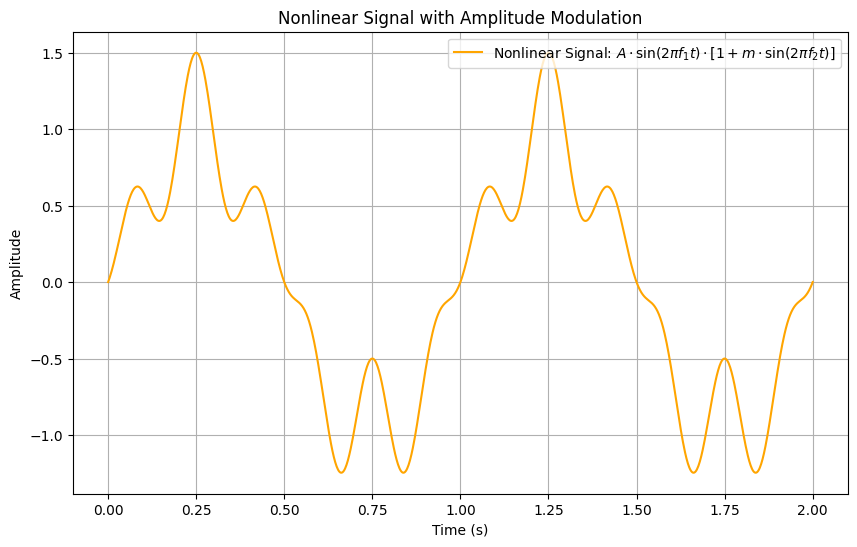

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nonlinear signal function
def nonlinear_signal(t, A=1, f1=1, m=0.5, f2=5):
    carrier_signal = A * np.sin(2 * np.pi * f1 * t)
    modulation_signal = 1 + m * np.sin(2 * np.pi * f2 * t)
    return carrier_signal * modulation_signal

# Generate time values
t_values = np.linspace(0, 2, 1000)

# Calculate the nonlinear signal values
x_values = nonlinear_signal(t_values)

# Plot the nonlinear signal
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='Nonlinear Signal: $A \cdot \sin(2\pi f_1 t) \cdot [1 + m \cdot \sin(2\pi f_2 t)]$', color='orange')
plt.title('Nonlinear Signal with Amplitude Modulation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


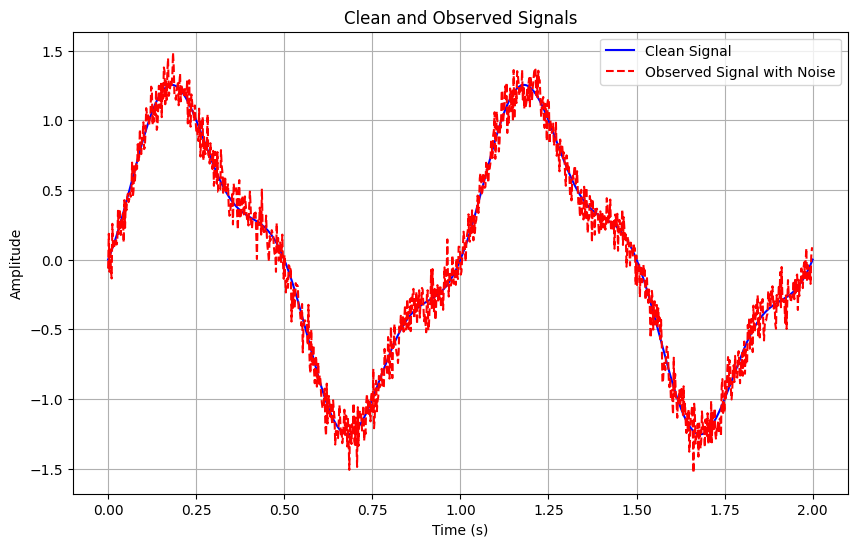

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the clean signal function
def clean_signal(t, A=1, f1=1, f2=2):
    return A * np.sin(2 * np.pi * f1 * t) * (1 + 0.5 * np.sin(2 * np.pi * f2 * t))

# Generate time values
t_values = np.linspace(0, 2, 1000)

# Generate the clean signal
clean_signal_values = clean_signal(t_values)

# Simulate the observed signal with noise
noise_level = 0.1
observed_signal = clean_signal_values + noise_level * np.random.normal(size=len(t_values))

# Plot the clean and observed signals
plt.figure(figsize=(10, 6))
plt.plot(t_values, clean_signal_values, label='Clean Signal', color='blue')
plt.plot(t_values, observed_signal, label='Observed Signal with Noise', color='red', linestyle='--')
plt.title('Clean and Observed Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the nonlinear model architecture
def create_nonlinear_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(len(t_values),)),
        Dense(len(t_values), activation='linear')  # Output layer with linear activation for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training the nonlinear model
nonlinear_model = create_nonlinear_model()
nonlinear_model.fit(np.expand_dims(observed_signal, axis=0), np.expand_dims(clean_signal_values, axis=0), epochs=50, verbose=0)


1/1 [==============================] - 0s 96ms/step


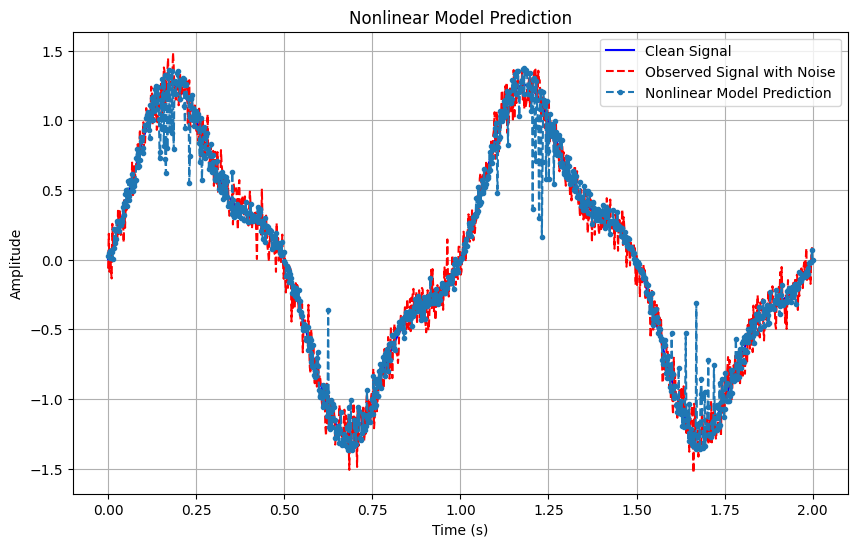

In [ ]:
# Evaluate nonlinear model on simulated data
nonlinear_prediction = nonlinear_model.predict(np.expand_dims(observed_signal, axis=0)).flatten()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_values, clean_signal_values, label='Clean Signal', color='blue')
plt.plot(t_values, observed_signal, label='Observed Signal with Noise', color='red', linestyle='--')
plt.plot(t_values, nonlinear_prediction, label='Nonlinear Model Prediction', linestyle='--', marker='.')
plt.title('Nonlinear Model Prediction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


1/1 [==============================] - 0s 93ms/step


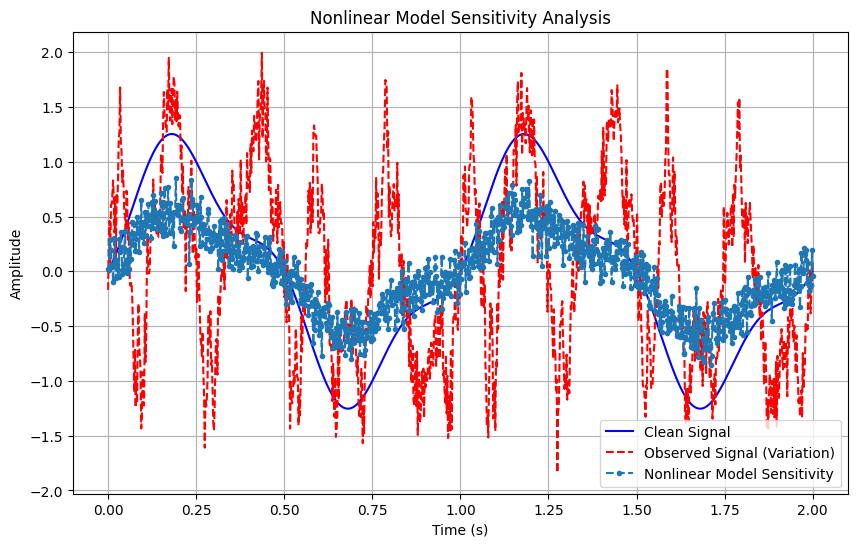

In [ ]:
# Analyze sensitivity of nonlinear model
observed_signal_variation = simulate_nonlinear_forward_problem(clean_signal_values, nonlinear_signal, noise_level * 2)
nonlinear_sensitivity = nonlinear_model.predict(np.expand_dims(observed_signal_variation, axis=0)).flatten()

# Plot sensitivity analysis results
plt.figure(figsize=(10, 6))
plt.plot(t_values, clean_signal_values, label='Clean Signal', color='blue')
plt.plot(t_values, observed_signal_variation, label='Observed Signal (Variation)', color='red', linestyle='--')
plt.plot(t_values, nonlinear_sensitivity, label='Nonlinear Model Sensitivity', linestyle='--', marker='.')
plt.title('Nonlinear Model Sensitivity Analysis')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


32/32 [==============================] - 0s 4ms/step


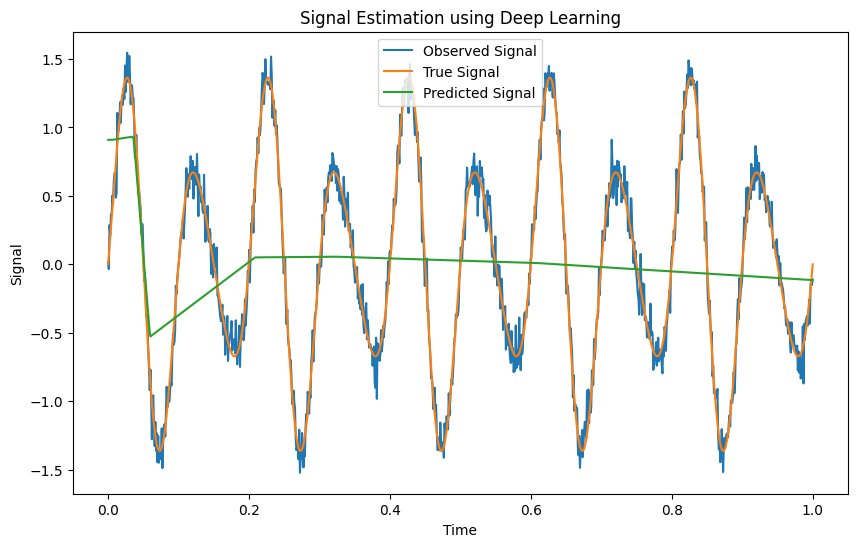

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate simulated data based on the nonlinear signal model
def generate_data(num_samples, t, A, f1, f2):
    x_true = A * np.sin(2 * np.pi * f1 * t) * (1 + 0.5 * np.sin(2 * np.pi * f2 * t))
    noise = np.random.normal(0, 0.1, size=num_samples)
    observed_signal = x_true + noise
    return observed_signal, x_true

# Define the deep learning model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

# Generate training data
num_samples = 1000
t = np.linspace(0, 1, num_samples)
A = 1.0
f1 = 10.0
f2 = 5.0
observed_signal, true_signal = generate_data(num_samples, t, A, f1, f2)

# Create the deep learning model
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 100
history = model.fit(t, observed_signal, epochs=epochs, verbose=0)

# Evaluate the model on training data
predicted_signal = model.predict(t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, observed_signal, label='Observed Signal')
plt.plot(t, true_signal, label='True Signal')
plt.plot(t, predicted_signal, label='Predicted Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal Estimation using Deep Learning')
plt.legend()
plt.show()

32/32 [==============================] - 0s 2ms/step


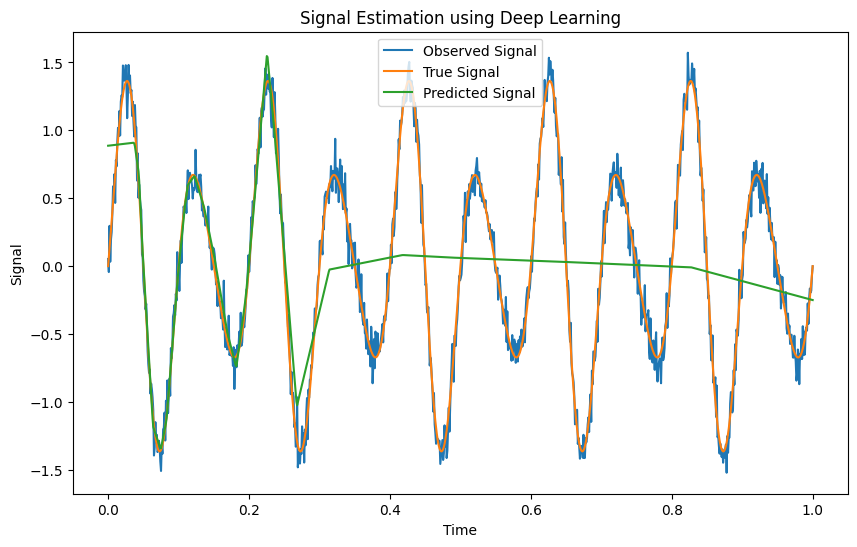

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate simulated data based on the nonlinear signal model
def generate_data(num_samples, t, A, f1, f2):
    x_true = A * np.sin(2 * np.pi * f1 * t) * (1 + 0.5 * np.sin(2 * np.pi * f2 * t))
    noise = np.random.normal(0, 0.1, size=num_samples)
    observed_signal = x_true + noise
    return observed_signal, x_true

# Define the deep learning model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

# Generate training data
num_samples = 1000
t = np.linspace(0, 1, num_samples)
A = 1.0
f1 = 10.0
f2 = 5.0
observed_signal, true_signal = generate_data(num_samples, t, A, f1, f2)

# Normalize the training data
observed_signal_mean = np.mean(observed_signal)
observed_signal_std = np.std(observed_signal)
observed_signal_normalized = (observed_signal - observed_signal_mean) / observed_signal_std
t_normalized = (t - np.min(t)) / (np.max(t) - np.min(t))  # Normalize the time variable as well

# Create the deep learning model
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data for model training
t_normalized_reshaped = t_normalized.reshape(-1, 1)
observed_signal_normalized_reshaped = observed_signal_normalized.reshape(-1, 1)

# Train the model
epochs = 1000
history = model.fit(t_normalized_reshaped, observed_signal_normalized_reshaped, epochs=epochs, verbose=0)

# Generate test data
test_t = np.linspace(0, 1, num_samples)
test_observed_signal, test_true_signal = generate_data(num_samples, test_t, A, f1, f2)
test_observed_signal_normalized = (test_observed_signal - observed_signal_mean) / observed_signal_std
test_t_normalized = (test_t - np.min(test_t)) / (np.max(test_t) - np.min(test_t))  # Normalize test time variable

# Reshape the test data for prediction
test_t_normalized_reshaped = test_t_normalized.reshape(-1, 1)

# Make predictions on the test data
predicted_signal_normalized = model.predict(test_t_normalized_reshaped)
predicted_signal = (predicted_signal_normalized * observed_signal_std) + observed_signal_mean

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_t, test_observed_signal, label='Observed Signal')
plt.plot(test_t, test_true_signal, label='True Signal')
plt.plot(test_t, predicted_signal, label='Predicted Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Signal Estimation using Deep Learning')
plt.legend()
plt.show()

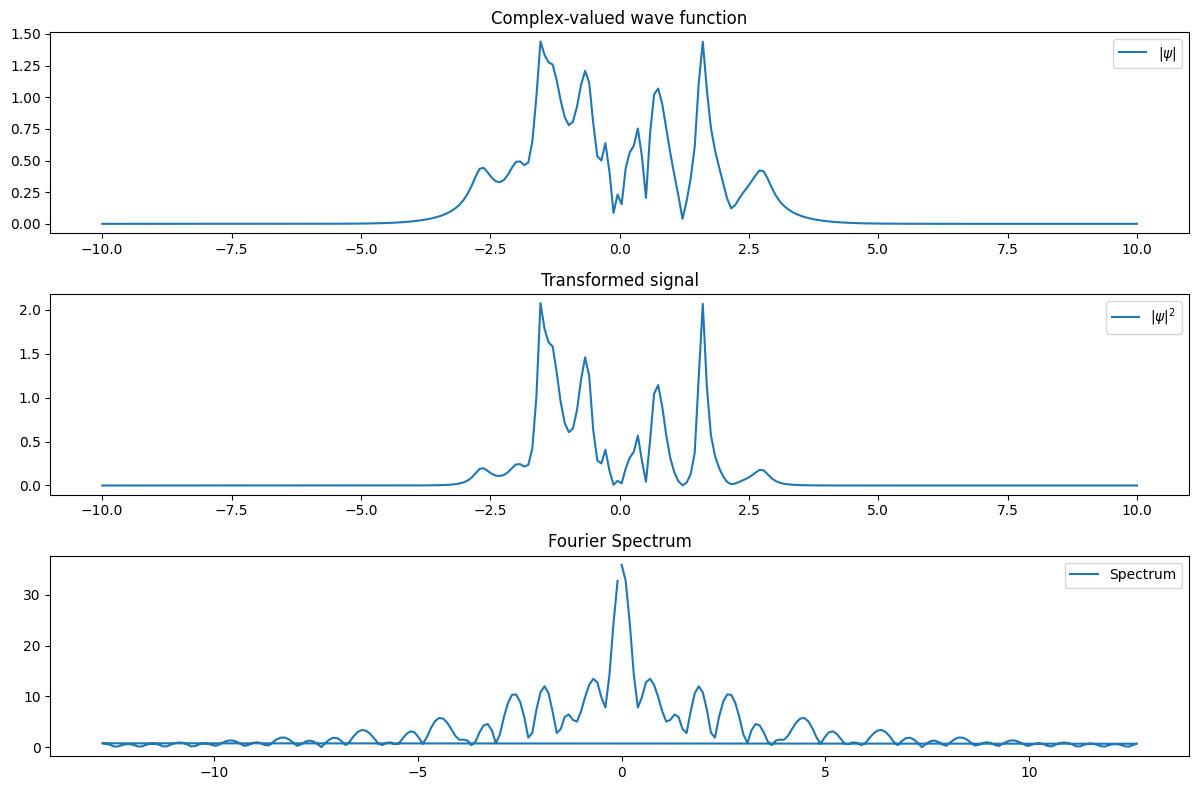

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parameters
beta = 0.1  # Adjusted beta to avoid overflow
gamma = 1.0
L = 20.0  # Adjusted length of spatial domain
T = 10.0  # Adjusted total simulation time
Nx = 256
Nt = 256

# Discretization
x = np.linspace(-L/2, L/2, Nx)
t = np.linspace(0, T, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# Initial condition for the wave function
psi0 = np.exp(-(x**2)/4) * np.exp(1j * 0.2 * x)  # Adjusted initial condition

# Numerical solution of NLSE
psi = psi0.copy()
for n in range(1, Nt):
    dpsi_dt = -1j * beta / 2 * fft(-1j * beta / 2 * fft(psi**2)) + 1j * gamma * np.abs(psi)**2 * psi
    psi = psi + dt * dpsi_dt

# Signal transformation
signal_transformed = np.abs(psi)**2

# Fourier analysis
freq = fftfreq(Nt, dt)
spectrum = np.abs(fft(signal_transformed))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, np.abs(psi), label=r'$|\psi|$')
plt.title('Complex-valued wave function')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, signal_transformed, label=r'$|\psi|^2$')
plt.title('Transformed signal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(freq, spectrum, label='Spectrum')
plt.title('Fourier Spectrum')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 7.0184e-05 - val_loss: 7.9799e-05
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 6.5798e-05 - val_loss: 7.9749e-05
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 6.5630e-05 - val_loss: 7.9720e-05
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 6.5682e-05 - val_loss: 7.9782e-05
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 6.5721e-05 - val_loss: 7.9575e-05
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 6.5638e-05 - val_loss: 7.9748e-05
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 6.5692e-05 - val_loss: 7.9666e-05
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 6.5659e-05 - val_loss: 7.9544e-05
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 6.5663e-05 - val_loss: 7.9638e-05
Epoch 10/100
25/25 [================

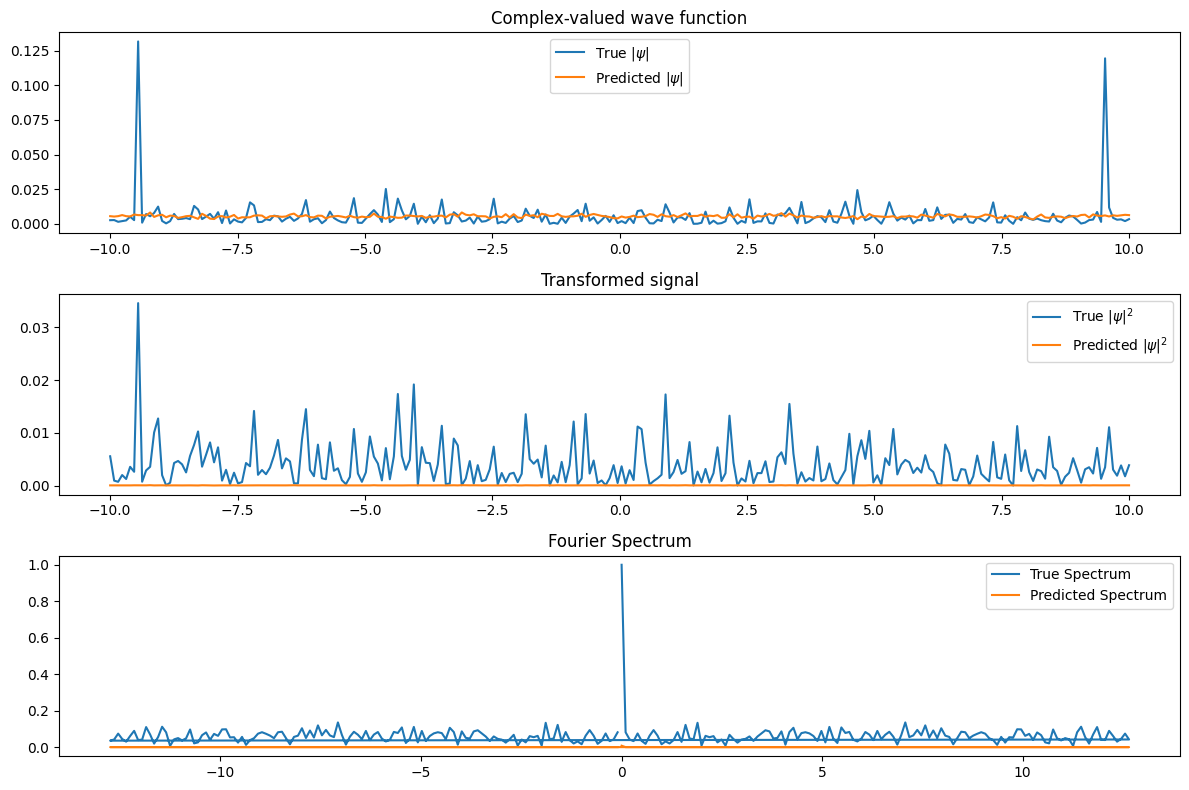

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Parameters for NLSE simulation
beta = 0.1
gamma = 1.0
L = 20.0
T = 10.0
Nx = 256
Nt = 256

# Discretization
x = np.linspace(-L/2, L/2, Nx)
t = np.linspace(0, T, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# Function to solve NLSE numerically
def solve_nlse(psi0, beta, gamma, dt, Nt):
    psi = psi0.copy()
    for n in range(1, Nt):
        dpsi_dt = -1j * beta / 2 * fft(-1j * beta / 2 * fft(psi**2)) + 1j * gamma * np.abs(psi)**2 * psi
        psi = psi + dt * dpsi_dt
    return np.abs(psi)**2

# Generate training data
X_train = []
y_train = []

for _ in range(1000):  # Adjust the number of samples as needed
    # Random initial condition for the wave function
    psi0 = np.random.normal(0, 1, Nx) + 1j * np.random.normal(0, 1, Nx)
    psi0 /= np.linalg.norm(psi0)

    # Numerical solution of NLSE
    signal_transformed = solve_nlse(psi0, beta, gamma, dt, Nt)

    X_train.append(np.abs(psi0)**2)
    y_train.append(signal_transformed)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple neural network architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='linear')
])

# Compile the model with an appropriate loss function and optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using the generated dataset
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Predict using the trained model
y_pred = model.predict(X_val)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, np.abs(y_val[0]), label='True $|\psi|$')
plt.plot(x, np.abs(y_pred[0]), label='Predicted $|\psi|$')
plt.title('Complex-valued wave function')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, X_val[0], label='True $|\psi|^2$')
plt.plot(x, np.abs(y_pred[0])**2, label='Predicted $|\psi|^2$')
plt.title('Transformed signal')
plt.legend()

plt.subplot(3, 1, 3)
freq = fftfreq(Nt, dt)
plt.plot(freq, np.abs(fft(X_val[0])), label='True Spectrum')
plt.plot(freq, np.abs(fft(np.abs(y_pred[0])**2)), label='Predicted Spectrum')
plt.title('Fourier Spectrum')
plt.legend()

plt.tight_layout()
plt.show()
